In [1]:
%env PATH=$PATH:/Library/TeX/texbin/:/opt/homebrew/Caskroom/miniforge/base/envs/book/bin/

env: PATH=$PATH:/Library/TeX/texbin/:/opt/homebrew/Caskroom/miniforge/base/envs/book/bin/


In [2]:
%load_ext jupyter_tikz 

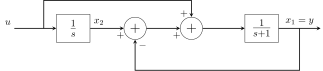

In [3]:
%%tikz -l positioning,calc,arrows --save-image=ex1-block.svg
\begin{tikzpicture}[
    node distance=1.5cm and 1.2cm,
    block/.style={rectangle, draw, minimum width=1.2cm, minimum height=1cm},
    sum/.style={draw, circle, inner sep=2pt, minimum size=0.8cm},
    input/.style={coordinate},
    output/.style={coordinate},
    arrow/.style={->, >=stealth, thick}
]

    % --- Nodes ---
    \node [input] (u) {};
    % First block (Integrator)
    \node [block, right=1.5cm of u] (int1) {\Large $\frac{1}{s}$};
    
    % First Summing Junction
    \node [sum, right=of int1] (sum1) {\Large $+$};
    
    % Second Summing Junction
    \node [sum, right=of sum1] (sum2) {\Large $+$};
    
    % Second block
    \node [block, right=1.5cm of sum2] (sys1) {\Large $\frac{1}{s+1}$};
    
    % Output
    \node [output, right=1.5cm of sys1] (y) {};

    % --- Drawing lines & Labels ---
    
    % Input u to Integrator 1
    \draw [arrow] (u) -- (int1) node[pos=0, above left] {$u$};
    
    % Branch from u to the top of sum2
    \draw [arrow] ($(u)!0.5!(int1)$) -- ++(0,1) -| (sum2.north) node[pos=0.9, left] {$+$};

    % int1 to sum1
    \draw [arrow] (int1) -- (sum1) node[pos=0, above right] {$x_2$} node[pos=0.9, below] {$+$};
    
    % sum1 to sum2
    \draw [arrow] (sum1) -- (sum2) node[pos=0.9, below] {$+$};
    
    % sum2 to second block
    \draw [arrow] (sum2) -- (sys1);
    
    % second block to output y
    \draw [arrow] (sys1) -- (y) node[midway, above] {$x_1 = y$};
    
    % Feedback loop from y to sum1
    \draw [arrow] ($(sys1.east)!0.5!(y)$) -- ++(0,-1.5) -| (sum1.south) node[pos=0.9, right] {$-$};

\end{tikzpicture}

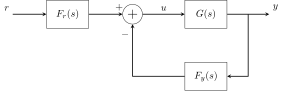

In [5]:
%%tikz -l positioning,calc,arrows --save-image=ex1-2dof.svg
\begin{tikzpicture}[
    node distance=2cm,
    block/.style={rectangle, draw, minimum width=1.5cm, minimum height=1cm},
    sum/.style={draw, circle, inner sep=2pt, minimum size=0.6cm},
    input/.style={coordinate},
    output/.style={coordinate},
    arrow/.style={->, >=stealth, thick}
]

    % --- Nodes ---
    \node [input] (r) {};
    \node [block, right=1.2cm of r] (fr) {$F_r(s)$};
    \node [sum, right=1.2cm of fr] (sum) {\Large $+$};
    \node [block, right=1.5cm of sum] (g) {$G(s)$};
    \node [output, right=1.5cm of g] (y) {};
    
    % Feedback block below G(s)
    \node [block, below=1.2cm of g] (fy) {$F_y(s)$};

    % --- Connections ---
    
    % Forward Path
    \draw [arrow] (r) -- (fr) node[pos=0, above left] {$r$};
    \draw [arrow] (fr) -- (sum) node[pos=0.9, above] {$+$};
    \draw [arrow] (sum) -- (g) node[midway, above] {$u$};
    \draw [arrow] (g) -- (y) node[pos=1, above right] {$y$};
    
    % Feedback Path
    % Branching point after G(s)
    \path (g) -- (y) coordinate[pos=0.5] (branch);
    \draw [arrow] (branch) |- (fy);
    \draw [arrow] (fy) -| (sum) node[pos=0.9, left] {$-$};

\end{tikzpicture}